In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

import random
import math

import boto3
from PIL import Image

from tqdm import tqdm
getattr(tqdm, '_instances', {}).clear()  # ⬅ add this line


import matplotlib.image as mpimg # show images
from io import BytesIO # reading bytes

import pickle # save images
import time # get time stamp of models trained

%matplotlib inline

#plt.style.use('ggplot')

pd.set_option('display.max_columns', 50)

# Import Images

In [ ]:
# grab and resize image from and to s3 bucket

bucket = 'nano-materials'
img_dir = 'data-raw' # folder containing all other folders of images
folders = ['Biological', 'Fibres', 'Films_Coated_Surface', 'MEMS_devices_and_electrodes', 'Nanowires', 'Particles', 'Patterned_surface', 'Porous_Sponge', 'Powder', 'Tips']

def resize_images_array(img_dir, folders, bucket):
    # arrays of image pixels
    img_arrays = []
    labels = []
    
    # loop through the dataframe that is linked to its label so that all images are in the same order
    for folder in tqdm(folders):
        s3 = boto3.client('s3')
        enter_folder = s3.list_objects_v2(Bucket=bucket, Prefix=f'{img_dir}/{folder}')
        for i in enter_folder['Contents'][2:]:
            try:
                filepath = i['Key']
                obj = s3.get_object(Bucket=bucket, Key=f'{filepath}')
                img_bytes = BytesIO(obj['Body'].read())
                open_img = Image.open(img_bytes)
                arr = np.array(open_img.resize((299,299))) # resize to 200,200. possible to play around with better or worse resolution
                img_arrays.append(arr)
                labels.append(folder)
            except:
                print(filepath) # get file_path of ones that fail to load
                continue

    return np.array(img_arrays), np.array(labels)

In [ ]:
X, y = resize_images_array(img_dir, folders, bucket)

In [ ]:
print('X shape: ', X.shape)
print('y_shape: ', y.shape)

In [ ]:
y

# Look at single image

In [2]:
s3 = boto3.client('s3')
bucket = 'nano-materials'

# grab biologcal image
obj = s3.get_object(Bucket=bucket, Key=f'data-raw/Biological/L7_5cea210c88be7496e67d8f763f870946.jpg')
img_bytes = BytesIO(obj['Body'].read())
biological1 = Image.open(img_bytes)

# grab biologcal image 2
obj = s3.get_object(Bucket=bucket, Key=f'data-raw/Biological/L7_cff935f043f6d5de64b9f93c0aed4814.jpg')
img_bytes = BytesIO(obj['Body'].read())
biological2 = Image.open(img_bytes)

# grab  biologcal image 3
obj = s3.get_object(Bucket=bucket, Key=f'data-raw/Biological/L7_dc0be0e9c5311055553bb42624728a4e.jpg')
img_bytes = BytesIO(obj['Body'].read())
biological3 = Image.open(img_bytes)

# grab  biologcal image 4
obj = s3.get_object(Bucket=bucket, Key=f'data-raw/Biological/L7_f69fb61d56c3baec5094bd32264aad2c.jpg')
img_bytes = BytesIO(obj['Body'].read())
biological4 = Image.open(img_bytes)


# grab fiber image
obj = s3.get_object(Bucket=bucket, Key=f'data-raw/Fibres/L9_1b95a3808073c0edad3454d1dedf3dcc.jpg')
img_bytes = BytesIO(obj['Body'].read())
fiber1 = Image.open(img_bytes)

# grab fiber image
obj = s3.get_object(Bucket=bucket, Key=f'data-raw/Fibres/L9_1b95a3808073c0edad3454d1dedf3dcc.jpg')
img_bytes = BytesIO(obj['Body'].read())
fiber1 = Image.open(img_bytes)

# grab Films_Coated_Surface image
obj = s3.get_object(Bucket=bucket, Key=f'data-raw/Films_Coated_Surface/L3_2a41bd0343029358e25dec9dd380ad37.jpg')
img_bytes = BytesIO(obj['Body'].read())
Films_Coated_Surface1 = Image.open(img_bytes)

# grab MEMS_devices_and_electrodes image
obj = s3.get_object(Bucket=bucket, Key=f'data-raw/MEMS_devices_and_electrodes/L8_0ab7bab6ebe45bdac9479b60d6f675a8.jpg')
img_bytes = BytesIO(obj['Body'].read())
MEMS_devices_and_electrodes1 = Image.open(img_bytes)

# grab Nanowires image
obj = s3.get_object(Bucket=bucket, Key=f'data-raw/Nanowires/L6_0b6008755ef0efe40fed954cf74f6bed.jpg')
img_bytes = BytesIO(obj['Body'].read())
Nanowires1 = Image.open(img_bytes)

# grab Particles image
obj = s3.get_object(Bucket=bucket, Key=f'data-raw/Particles/L2_2de7a04a6cc07bd0a840921af941fdb4.jpg')
img_bytes = BytesIO(obj['Body'].read())
Nanoparticles1 = Image.open(img_bytes)

# grab Patterned_surface image
obj = s3.get_object(Bucket=bucket, Key=f'data-raw/Patterned_surface/L1_43624d2c7a99bd1f89257f344a77f116.jpg')
img_bytes = BytesIO(obj['Body'].read())
Patterned_surface1 = Image.open(img_bytes)

# grab Porous_Sponge image
obj = s3.get_object(Bucket=bucket, Key=f'data-raw/Porous_Sponge/L0_0f33d3d0e9efbe60c16a2aa1af3e128d.jpg')
img_bytes = BytesIO(obj['Body'].read())
Porous_Sponge1 = Image.open(img_bytes)

# grab Powder image
obj = s3.get_object(Bucket=bucket, Key=f'data-raw/Powder/L4_b5ac971eab02b63107d7b2e2bdcb20c2.jpg')
img_bytes = BytesIO(obj['Body'].read())
Powder1 = Image.open(img_bytes)

# grab Tips image
obj = s3.get_object(Bucket=bucket, Key=f'data-raw/Tips/L5_0b5a46df1978d2fe53c120581ad93c13.jpg')
img_bytes = BytesIO(obj['Body'].read())
Tips1 = Image.open(img_bytes)

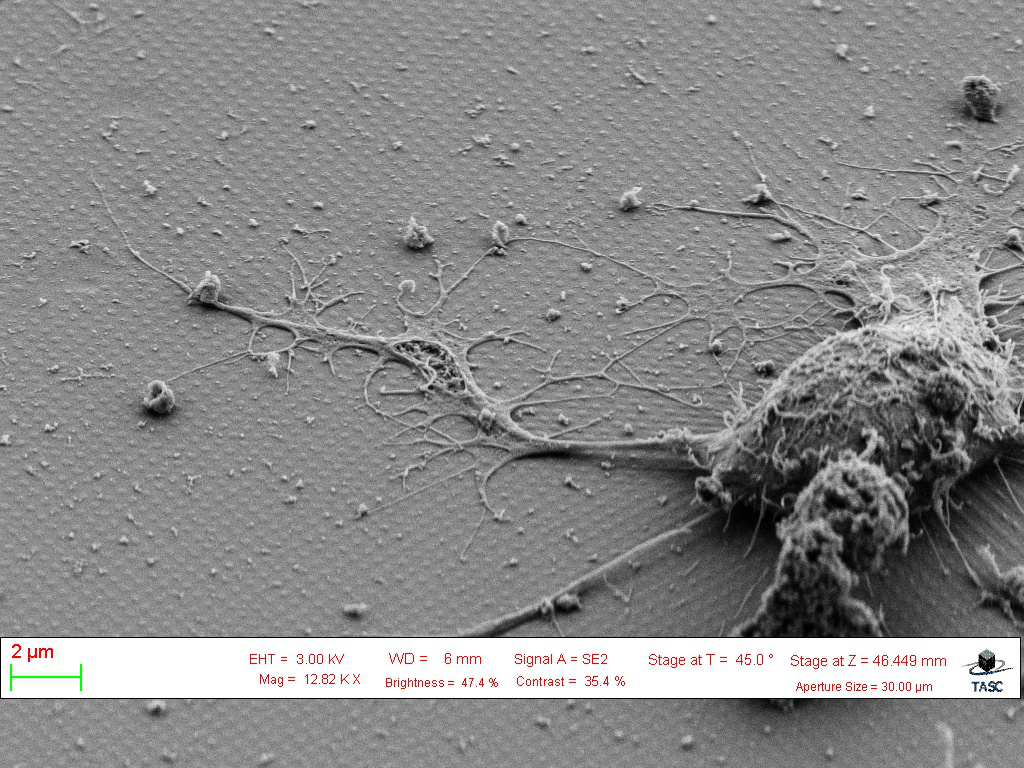

In [20]:
biological4

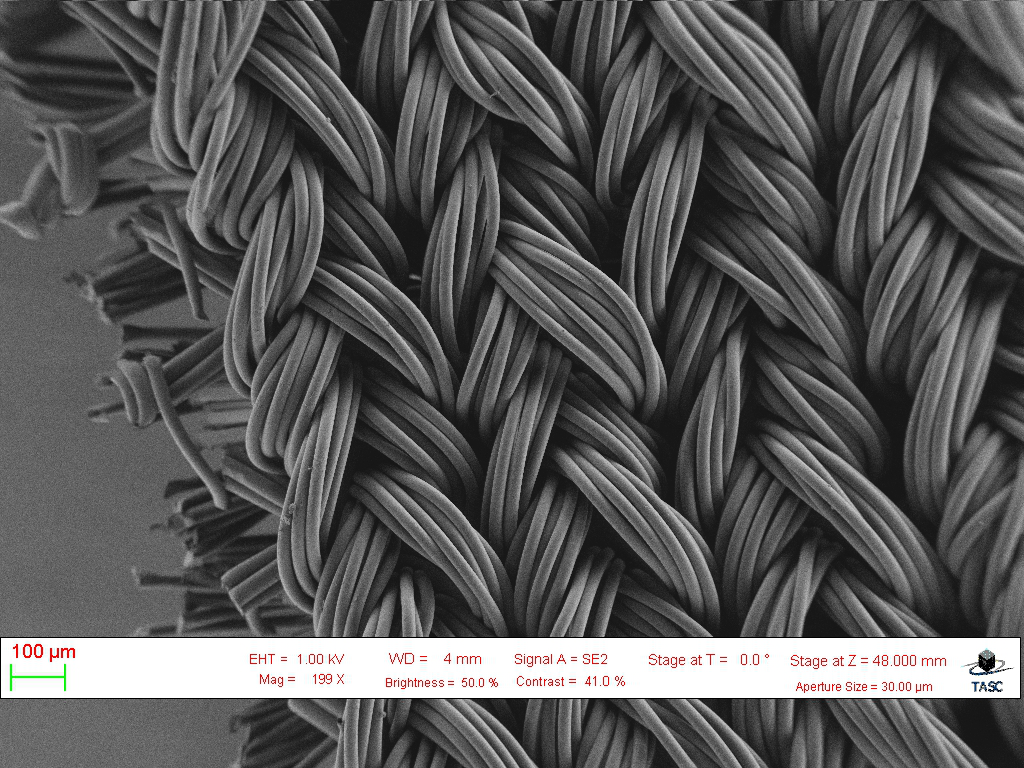

In [23]:
fiber1

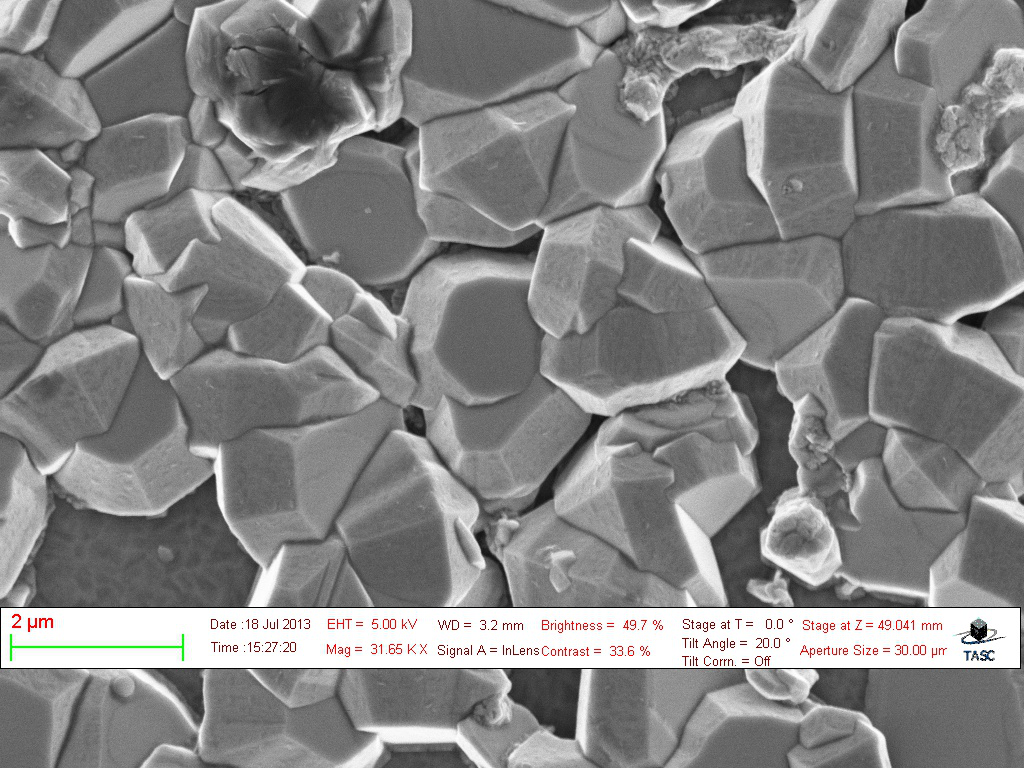

In [25]:
Films_Coated_Surface1

# Plot Example Images of Each Category Label

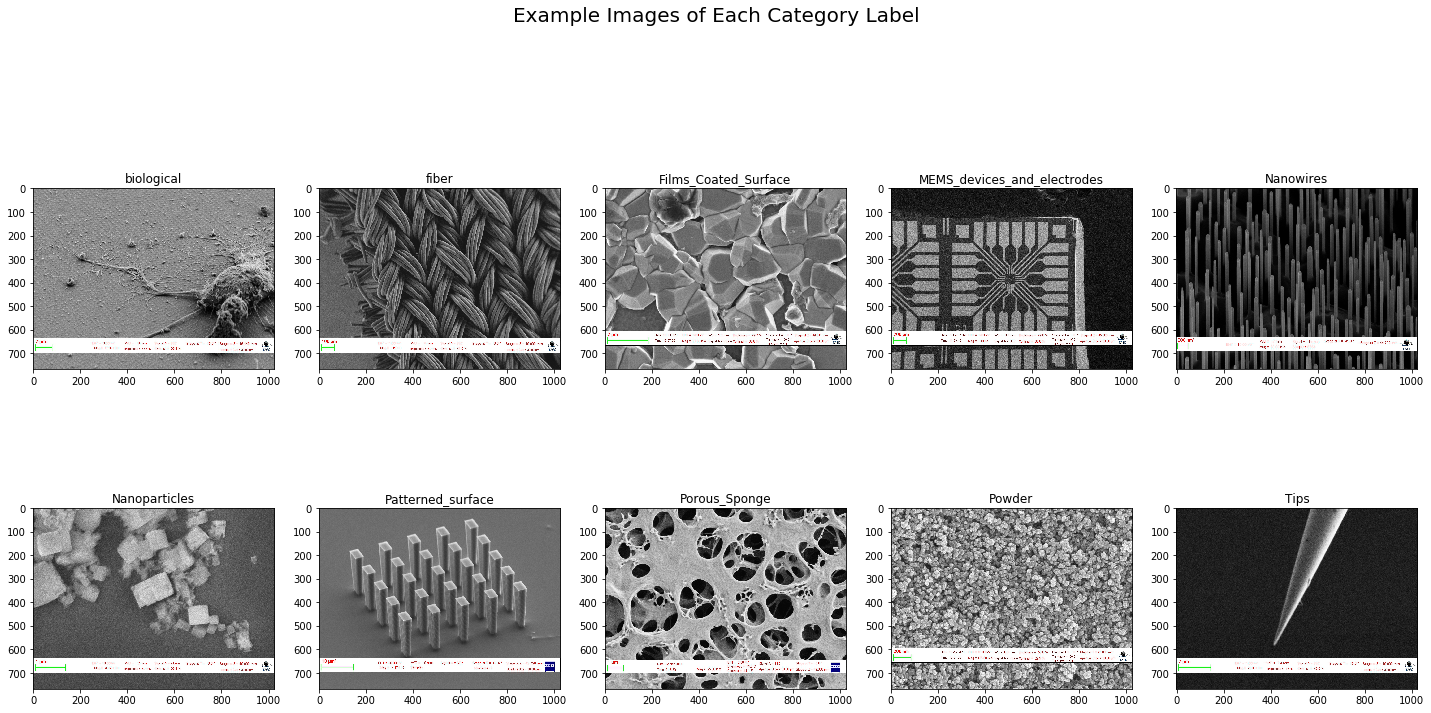

In [3]:
fig, axes = plt.subplots(2,5, figsize=(20,10));

fig.suptitle('Example Images of Each Category Label', y=1.1, fontsize=20)

axes[0][0].imshow(biological4);
axes[0][0].set_title('biological')

axes[0][1].imshow(fiber1);
axes[0][1].set_title('fiber')

axes[0][2].imshow(Films_Coated_Surface1);
axes[0][2].set_title('Films_Coated_Surface')

axes[0][3].imshow(MEMS_devices_and_electrodes1);
axes[0][3].set_title('MEMS_devices_and_electrodes')

axes[0][4].imshow(Nanowires1);
axes[0][4].set_title('Nanowires')

axes[1][0].imshow(Nanoparticles1);
axes[1][0].set_title('Nanoparticles')

axes[1][1].imshow(Patterned_surface1);
axes[1][1].set_title('Patterned_surface')

axes[1][2].imshow(Porous_Sponge1);
axes[1][2].set_title('Porous_Sponge')

axes[1][3].imshow(Powder1);
axes[1][3].set_title('Powder')

axes[1][4].imshow(Tips1);
axes[1][4].set_title('Tips')

plt.tight_layout()
plt.savefig('img/example_categories_plot.png')

# Normalize Feature Arrays

In [53]:
# normalize the RBG values
X = X/255.0

# Label and Features

In [ ]:
label = y.copy()
label

In [ ]:
print('Number of Biological: ', np.sum(label == 'Biological'))
print('Number of Fibres: ', np.sum(label == 'Fibres'))
print('Number of Films_Coated_Surface: ', np.sum(label == 'Films_Coated_Surface'))
print('Number of MEMS_devices_and_electrodes: ', np.sum(label == 'MEMS_devices_and_electrodes'))
print('Number of Nanowires: ', np.sum(label == 'Nanowires'))
print('Number of Particles: ', np.sum(label == 'Particles'))
print('Number of Patterned_surface: ', np.sum(label == 'Patterned_surface'))
print('Number of Porous_Sponge: ', np.sum(label == 'Porous_Sponge'))
print('Number of Powder: ', np.sum(label == 'Powder'))
print('Number of Tips: ', np.sum(label == 'Tips'))

In [ ]:
np.array(label.reshape(-1,1) == folders)

In [ ]:
y = np.array(label.reshape(-1,1) == folders).astype(float)

In [ ]:
y[:5]

In [ ]:
print('label shape: ', y.shape)
print('features shape: ', X.shape)